# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
!pip install ipyplot

In [2]:
import os
import ipyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import pickle
import pandas as pd
import random
import numpy as np
import cv2
from sklearn.utils import shuffle
from collections import OrderedDict, Counter
from scipy import ndimage
from scipy.ndimage import zoom
from tensorflow.contrib.layers import flatten
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
validation_file= "data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(OrderedDict.fromkeys(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


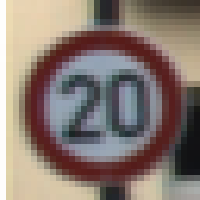
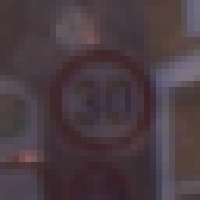
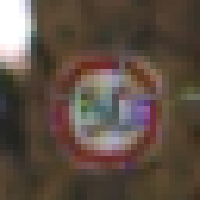
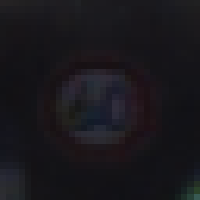
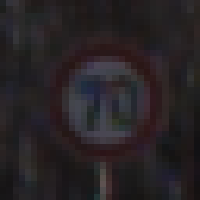
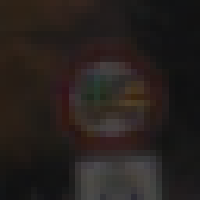
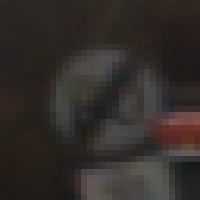
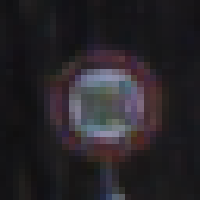
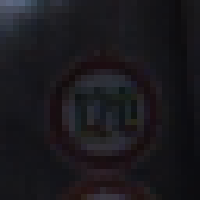
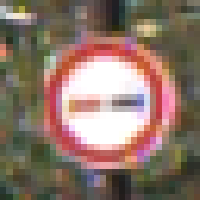
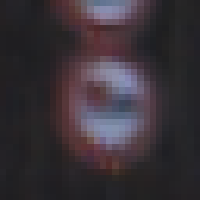
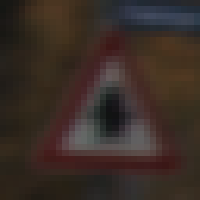
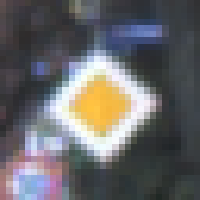
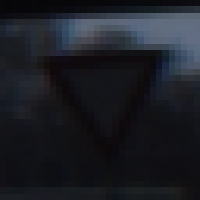
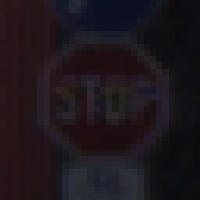
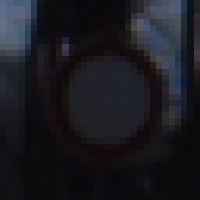
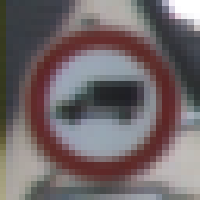
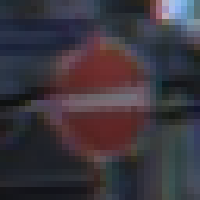
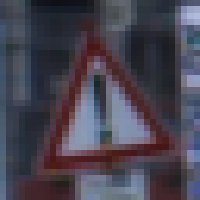
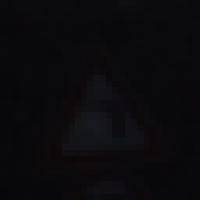
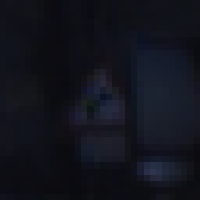
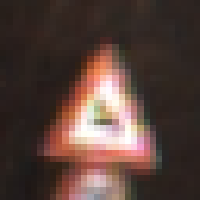
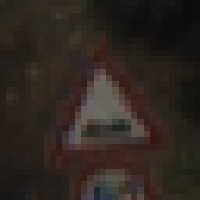
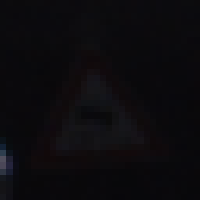
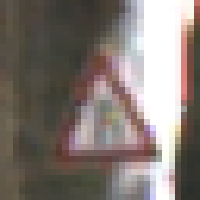
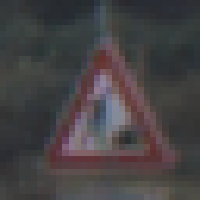
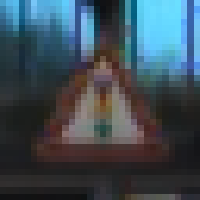
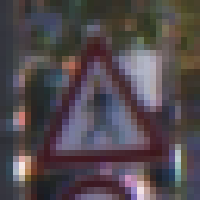
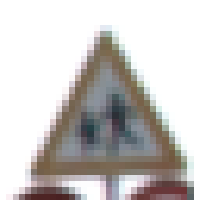
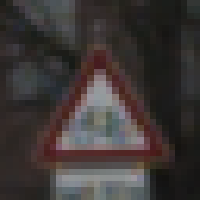
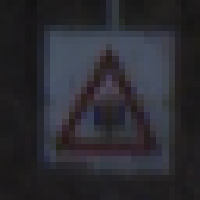
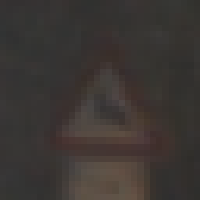
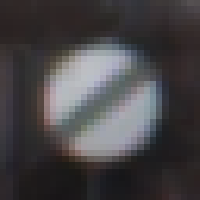
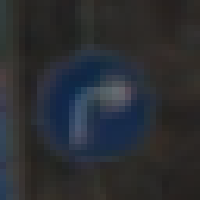
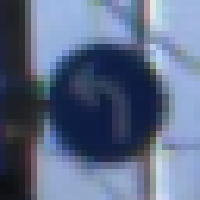
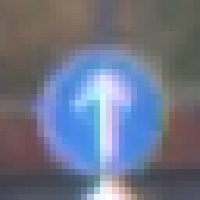
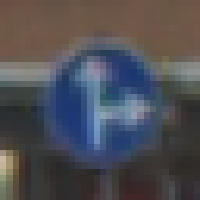
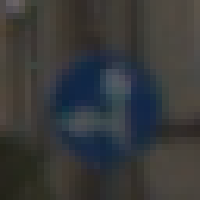
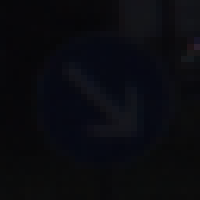
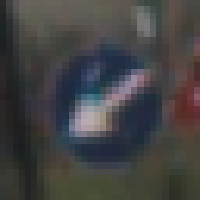
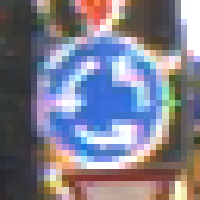
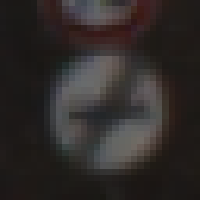
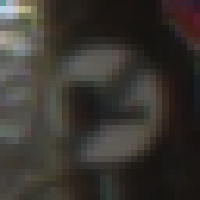


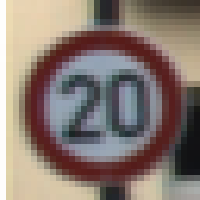
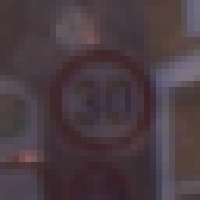
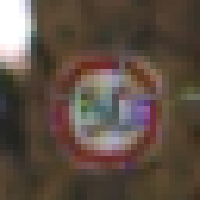
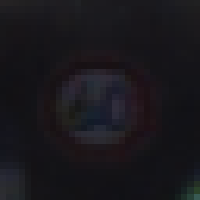
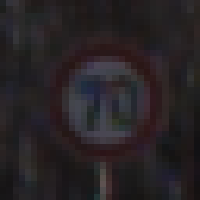
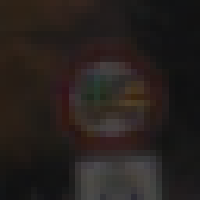
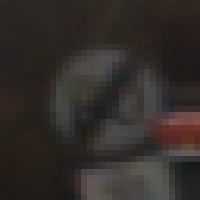
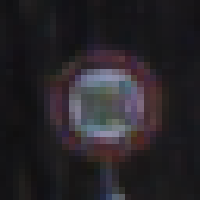
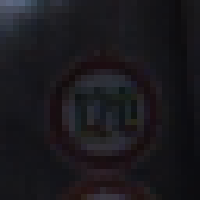
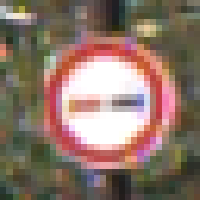
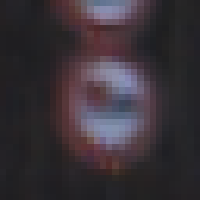
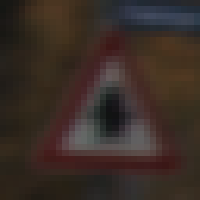
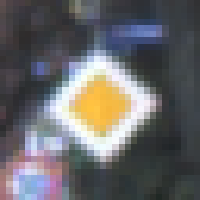
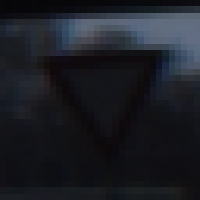
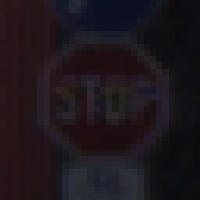
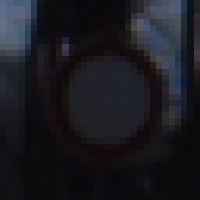
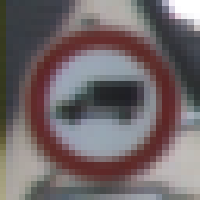
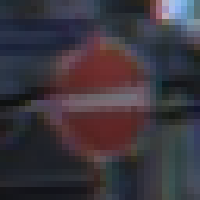
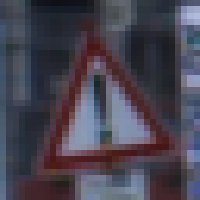
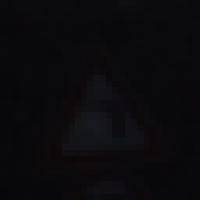
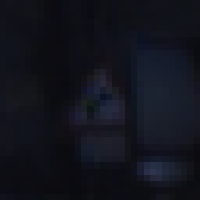
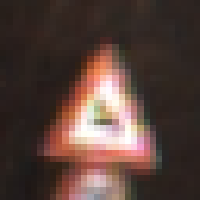
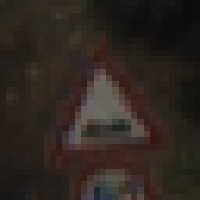
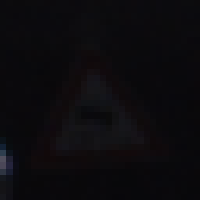
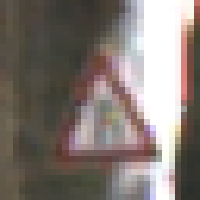
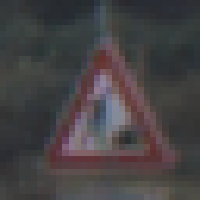
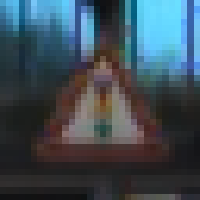
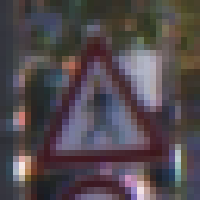
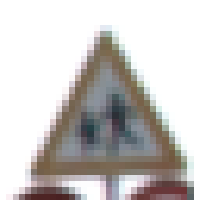
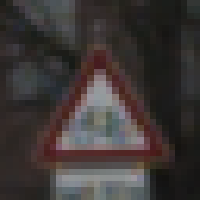
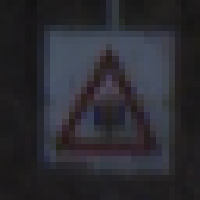
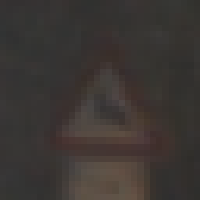
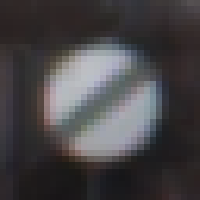
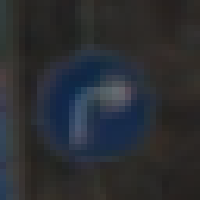
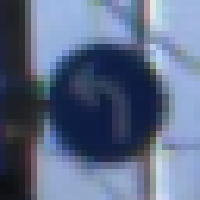
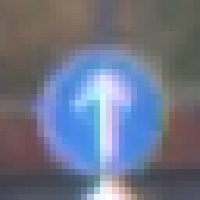
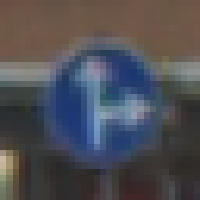
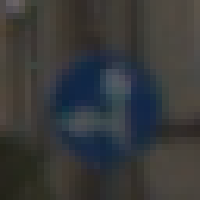
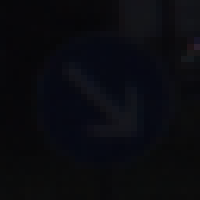
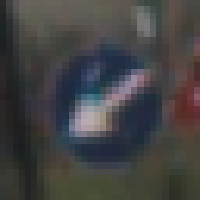
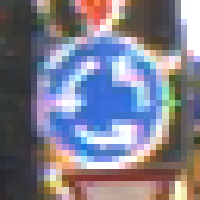
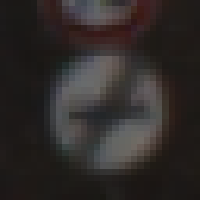
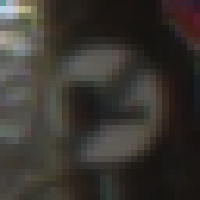

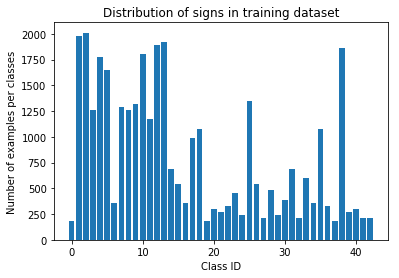

In [5]:
### Data exploration visualization code goes here.
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load signnames file
df = pd.read_csv("signnames.csv")
labels = df["SignName"]
class_images = []
for i,l in enumerate(labels):
    img = np.where(y_train == i)
    image = np.asarray(X_train[img[0][0]].squeeze())
    class_images.append(image)

ipyplot.plot_images(images=class_images, labels=labels, max_images=43, img_width=200)

sign_dist = Counter(y_train)
plt.bar(*zip(*sorted(sign_dist.items())))
plt.title('Distribution of signs in training dataset')
plt.xlabel('Class ID')
plt.ylabel('Number of examples per classes')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)
print("Number of training & val examples =", len(X_train))
print("Number of training & val labels =", len(y_train))

Number of training & val examples = 39209
Number of training & val labels = 39209


In [30]:
#data manipulation and add augmented data
X_train_new = np.expand_dims(np.copy(X_train[0]), axis=0) 
y_train_new = np.copy(y_train[0])
IMAGE_SIZE = 32

def img_rot(image):
    center = (IMAGE_SIZE/2, IMAGE_SIZE/2)
    fact = random.randint(-1,1)
    return cv2.warpAffine(image, cv2.getRotationMatrix2D(center, fact*15, 1), (IMAGE_SIZE, IMAGE_SIZE))

def img_shift(image):
    fact1 = random.randint(-5,5)
    fact2 = random.randint(-5,5)
    return ndimage.shift(image,[fact1,fact2,0])

def clipped_zoom(img, zoom_factor, **kwargs): # from stackoverflow ali_m
    h, w = img.shape[:2]
    # width and height of the zoomed image
    zh = int(np.round(zoom_factor * h))
    zw = int(np.round(zoom_factor * w))
    zoom_tuple = (zoom_factor,) * 2 + (1,) * (img.ndim - 2)
    # zooming out
    if zoom_factor < 1:
        top = (h - zh) // 2
        left = (w - zw) // 2
        out = np.zeros_like(img)
        out[top:top+zh, left:left+zw] = zoom(img, zoom_tuple, **kwargs)
    # zooming in
    elif zoom_factor > 1:
        # bounding box of the clip region within the input array
        top = (zh - h) // 2
        left = (zw - w) // 2
        out = zoom(img[top:top+zh, left:left+zw], zoom_tuple, **kwargs)
        # trim off any extra pixels at the edges
        trim_top = ((out.shape[0] - h) // 2)
        trim_left = ((out.shape[1] - w) // 2)
        out = out[trim_top:trim_top+h, trim_left:trim_left+w]
    # if zoom_factor == 1, just return the input array
    else:
        out = img
    return out

def img_zoom(image):     
    zoom_f = float(0.85 + (random.randint(1,3)/10))
    return clipped_zoom(image, zoom_f) 

X_train = np.concatenate((X_train, X_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)
print("Number of training & val examples =", len(X_train))
print("Number of training & val labels =", len(y_train))

img_temp = []
classes_done = []
for i in range(X_train.shape[0]):
    if sign_dist[y_train[i]] < 1000:
        for _ in range(15):
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
        sign_dist[y_train[i]] += 45
    elif sign_dist[y_train[i]] < 1500:
        for _ in range(10):
            img_temp.append(img_rot(X_train[i]))
            img_temp.append(img_shift(X_train[i]))
            img_temp.append(img_zoom(X_train[i]))
        sign_dist[y_train[i]] += 30
    else:
        if y_train[i] not in classes_done:
            classes_done.append(y_train[i])
            print(y_train[i], len(classes_done))
    for m in range(len(img_temp)):
        X_train_new = np.concatenate((X_train_new, np.expand_dims(img_temp[m], axis=0)))
        y_train_new = np.append(y_train_new, y_train[i])
    img_temp = []

print("Number of new training examples =", len(X_train_new))
print("Number of new training labels =", len(y_train_new))
X_train_new = np.concatenate((X_train, X_train_new), axis=0)
y_train_new = np.concatenate((y_train, y_train_new), axis=0)

# Create a dict out of augmented data
new_dataset = {'features': X_train_new, 'labels': y_train_new}
# Create a new pickle file with all the data
new_train_val_file = 'data/train_val_aug.p'
with open(new_train_val_file, mode='wb') as f:
    pickle.dump(new_dataset, f)
    
X_train, X_valid, y_train , y_valid = train_test_split(X_train_new, y_train_new,test_size=0.2, random_state=0)

Number of training & val examples = 76485
Number of training & val labels = 76485
10 1


/opt/conda/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:605: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


13 2
1 3
2 4
8 5
12 6
5 7
11 8
4 9
3 10
25 11
38 12
9 13


KeyboardInterrupt: 

In [7]:
new_train_val_file = 'data/train_val_aug.p'
with open(new_train_val_file, mode='rb') as f:
    train_val = pickle.load(f)    
X_train_new, y_train_new = train_val['features'], train_val['labels']
X_train, X_valid, y_train , y_valid = train_test_split(X_train_new, y_train_new,test_size=0.2, random_state=0)

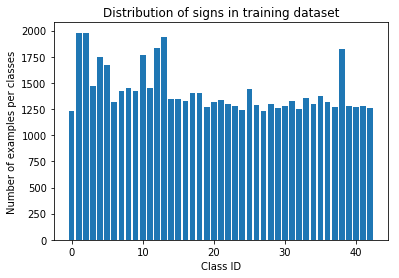

Distribution of signs in augmented training dataset : 
 Counter({1: 1980, 2: 1978, 13: 1939, 12: 1837, 38: 1828, 10: 1771, 4: 1748, 5: 1669, 3: 1474, 11: 1451, 8: 1448, 25: 1443, 7: 1425, 9: 1423, 18: 1408, 17: 1399, 35: 1375, 33: 1353, 14: 1351, 15: 1350, 21: 1340, 16: 1330, 31: 1328, 6: 1320, 20: 1318, 36: 1316, 22: 1300, 28: 1298, 34: 1297, 26: 1292, 23: 1282, 30: 1276, 41: 1275, 39: 1275, 19: 1268, 37: 1267, 40: 1267, 42: 1263, 29: 1262, 32: 1251, 24: 1245, 0: 1236, 27: 1232})


In [8]:
sign_dist = Counter(y_train)
plt.bar(*zip(*sorted(sign_dist.items())))
plt.title('Distribution of signs in training dataset')
plt.xlabel('Class ID')
plt.ylabel('Number of examples per classes')
plt.show()
print('Distribution of signs in augmented training dataset : \n', sign_dist)

In [9]:
def preproc_image(image):
    image[:,:,0]= cv2.equalizeHist(image[:,:,0])
    image[:,:,1]= cv2.equalizeHist(image[:,:,1])
    image[:,:,2]= cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    return image

X_train_nor = np.array([preproc_image(X_train[i]) for i in range(len(X_train))], dtype = np.float32)
X_valid_nor = np.array([preproc_image(X_valid[i]) for i in range(len(X_valid))], dtype = np.float32)
X_test_nor = np.array([preproc_image(X_test[i]) for i in range(len(X_test))], dtype = np.float32)

X_train = X_train_nor
X_valid = X_valid_nor
X_test = X_test_nor


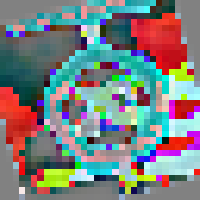
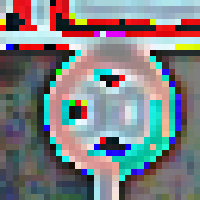
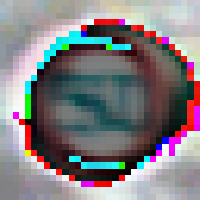
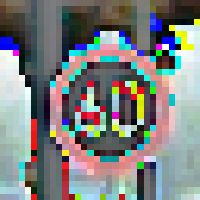
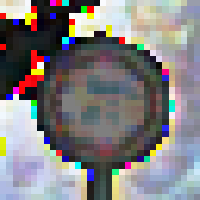
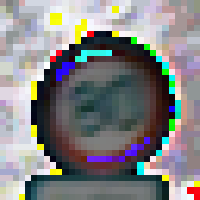
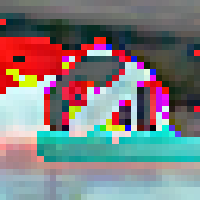
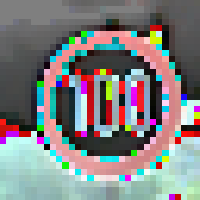
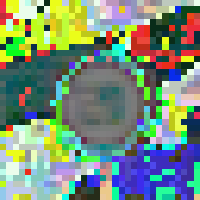
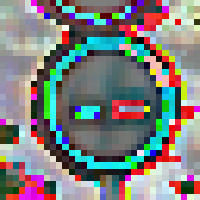
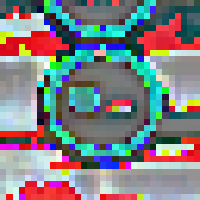
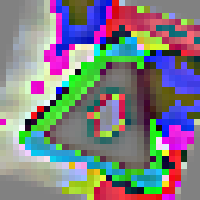
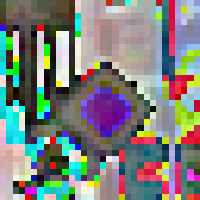
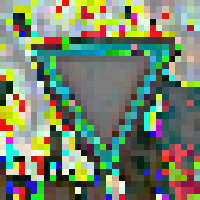
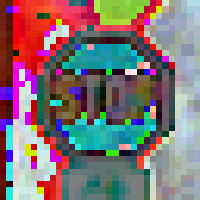
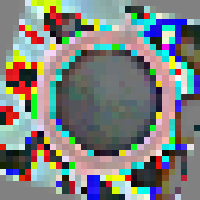
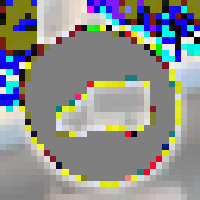
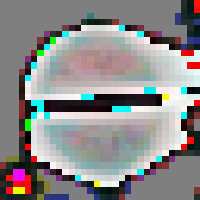
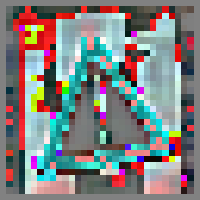
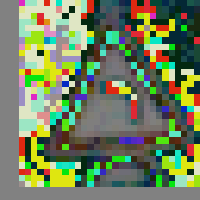
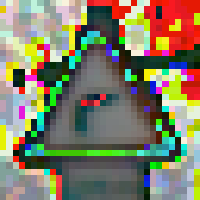
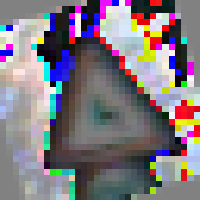
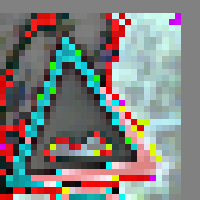
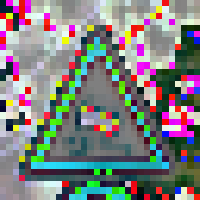
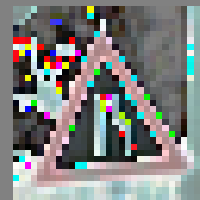
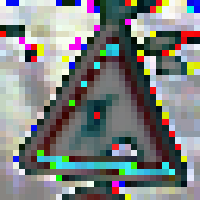
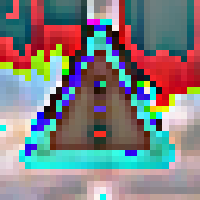
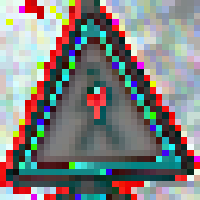
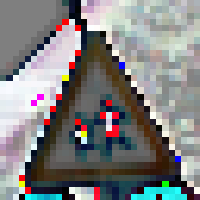
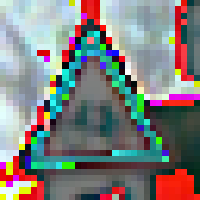
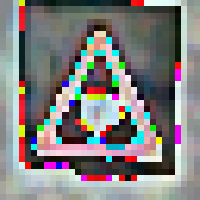
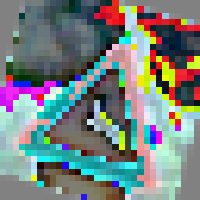
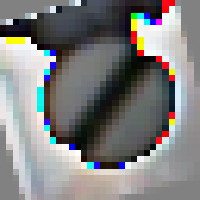
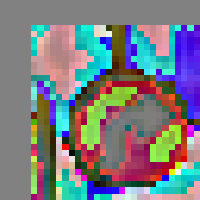
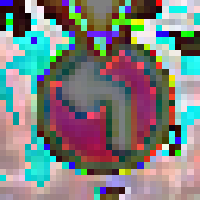
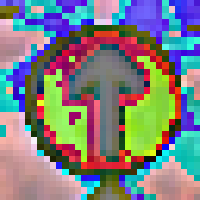
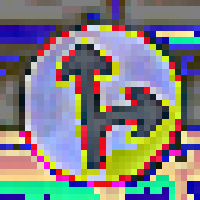
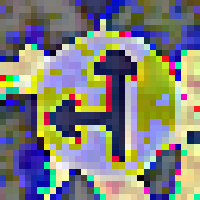
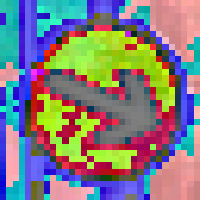
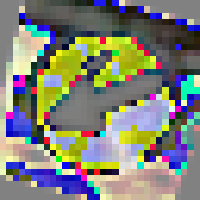
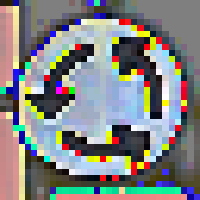
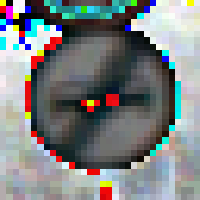
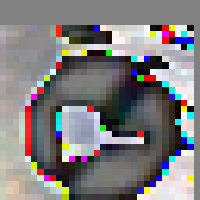


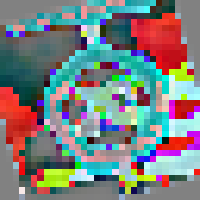
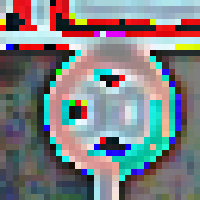
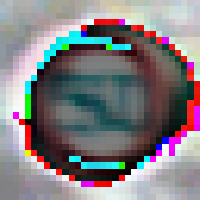
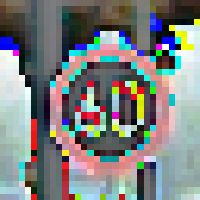
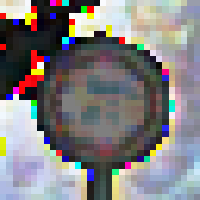
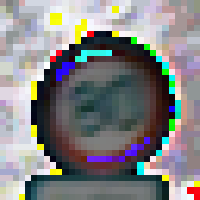
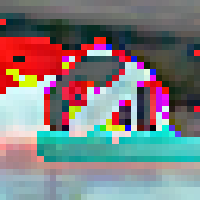
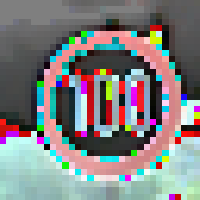
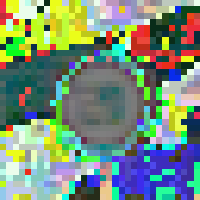
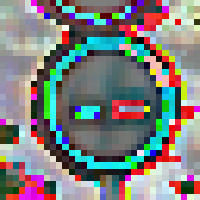
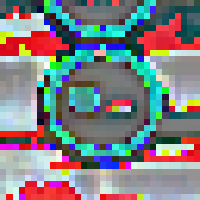
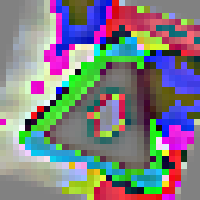
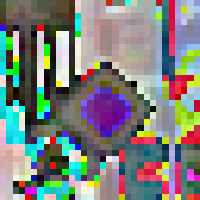
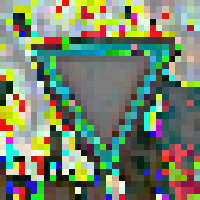
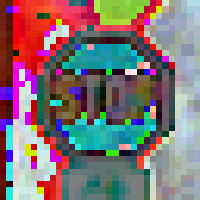
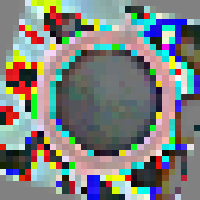
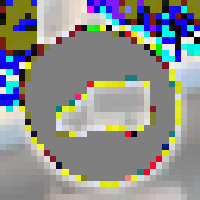
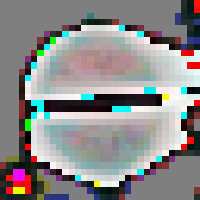
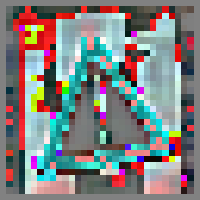
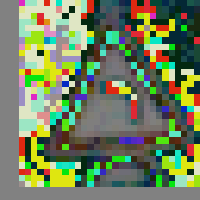
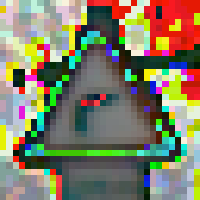
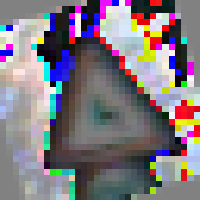
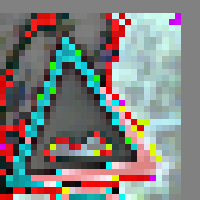
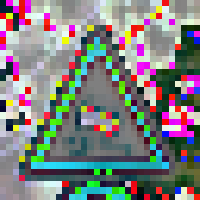
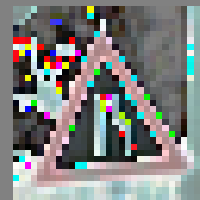
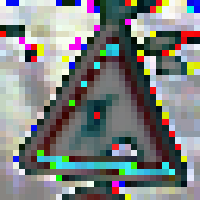
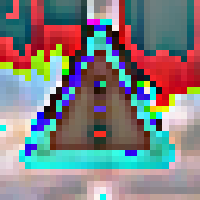
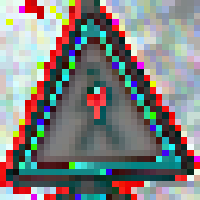
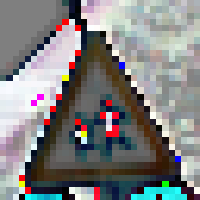
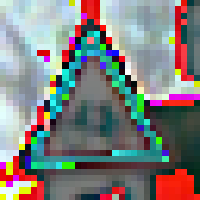
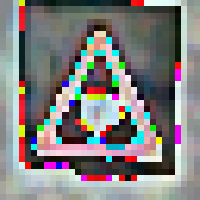
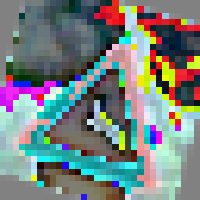
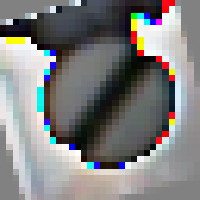
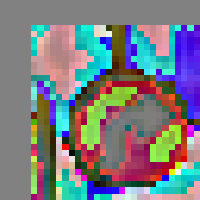
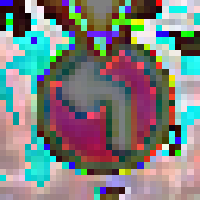
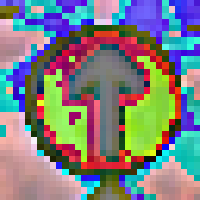
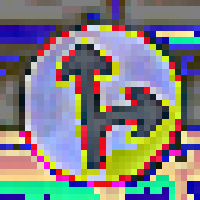
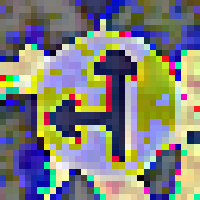
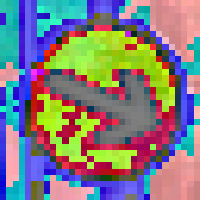
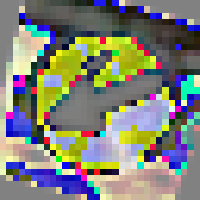
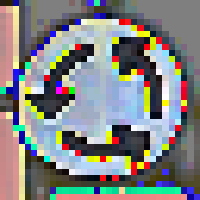
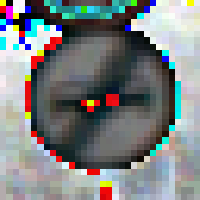
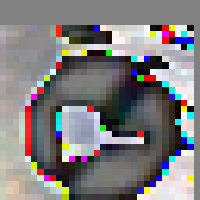

In [10]:
class_images = []
for i,l in enumerate(labels):
    img = np.where(y_train == i)
    image = np.asarray(X_train[img[0][0]].squeeze())
    class_images.append(image)
ipyplot.plot_images(images=class_images, labels=labels, max_images=43, img_width=200)

### Model Architecture

In [11]:
N_CLASSES = 43 # number of unique signs
# Parameters 
EPOCHS = 20
BATCH_SIZE = 256
LEARNING_RATE = 0.001
DROPOUT = 0.6

In [12]:
# def of convolution
def conv2d(x,W,b,strides):
    x = tf.nn.conv2d(x,W,strides = [1,strides, strides,1], padding = 'SAME')
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x)

# def of max_pooling
def maxpool2d(x, k):
    return tf.nn.max_pool(x, ksize = [1,k,k,1], strides = [1,k,k,1], padding = 'SAME')

def NeuralNetwork(x, dropit):    
    mu = 0
    sigma = 0.1
    c_in = 3
    c1 = 32
    c2 = 64
    c3 = 128
    d0 = 2048
    d1 = 512
    d2 = 128
    
    weights = {
                'wc1' : tf.Variable(tf.truncated_normal([3,3,c_in,c1],mu,sigma)),
                'wc2' : tf.Variable(tf.truncated_normal([3,3,c1,c2],mu,sigma)),
                'wc3' : tf.Variable(tf.truncated_normal([3,3,c2,c3],mu,sigma)),
                'wd1' : tf.Variable(tf.truncated_normal([d0,d1],mu,sigma)),
                'wd2' : tf.Variable(tf.truncated_normal([d1,d2],mu,sigma)),
                'out' : tf.Variable(tf.truncated_normal([d2,N_CLASSES],mu,sigma)),
    }
    
    biases = {
                'bc1' : tf.Variable(tf.random_normal([c1])),
                'bc2' : tf.Variable(tf.random_normal([c2])),
                'bc3' : tf.Variable(tf.random_normal([c3])),
                'bd1' : tf.Variable(tf.random_normal([d1])),
                'bd2' : tf.Variable(tf.random_normal([d2])),
                'out' : tf.Variable(tf.random_normal([N_CLASSES])),
    }

    conv1b = conv2d(x, weights['wc1'], biases['bc1'], strides = 1)
    conv1b = maxpool2d(conv1b, k=2)    
    conv2b = conv2d(conv1b, weights['wc2'], biases['bc2'], strides = 1)    
    conv2b = maxpool2d(conv2b, k=2)
    conv3b = conv2d(conv2b, weights['wc3'], biases['bc3'], strides = 1)    
    conv3b = maxpool2d(conv3b, k=2)     
    fl_sum = flatten(conv3b)
    fc1 = tf.add(tf.matmul(fl_sum, weights['wd1']),biases['bd1'])   
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropit)     
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']),biases['bd2'])     
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, dropit)    
    logits =  tf.add(tf.matmul(fc2, weights['out']),biases['out'])
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

In [14]:
logits = NeuralNetwork(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})        
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/float(num_examples), total_accuracy/float(num_examples)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
save_file = "model_weight/weight3.cpk"
acc_history = []
loss_history = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})        
        training_loss, training_accuracy = evaluate(X_train, y_train)
        validation_loss, validation_accuracy = evaluate(X_valid, y_valid)
        acc_history.append((training_accuracy, validation_accuracy))
        loss_history.append((training_loss,validation_loss))
        if i % 5 == 0:
            print(f"EPOCH:{i}  \tTraining Accuracy:{training_accuracy}\tValidation Accuracy:{validation_accuracy}")
        if i == (EPOCHS-1):
            print("EPOCH {} ...".format(i+1))
            print("DROPOUT {} ...".format(DROPOUT))        
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH:0  	Training Accuracy:0.27283127410603386	Validation Accuracy:0.27142576943147084
EPOCH:5  	Training Accuracy:0.9559227299470484	Validation Accuracy:0.9470484411590994
EPOCH:10  	Training Accuracy:0.9938713473230045	Validation Accuracy:0.9831339483901068
EPOCH:15  	Training Accuracy:0.9979734588481401	Validation Accuracy:0.9914362285739886
EPOCH 20 ...
DROPOUT 0.6 ...
Training Accuracy = 0.999
Validation Accuracy = 0.992

Model saved


In [18]:
with open('acc3.p', 'wb') as f:
    pickle.dump(acc_history, f)
with open('loss3.p','wb') as f:
    pickle.dump(loss_history, f)

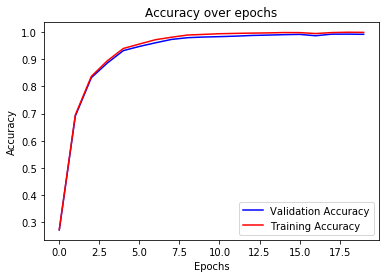

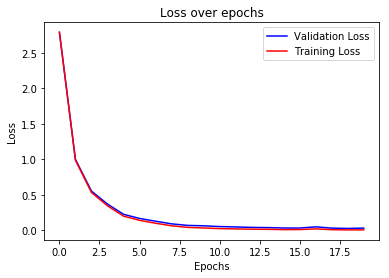

In [19]:
acc_file = 'acc3.p'
loss_file = 'loss3.p'
with open(acc_file, mode='rb') as f:
    acc_history = pickle.load(f)
with open(loss_file, mode='rb') as f:
    loss_history = pickle.load(f)
hist_acc = np.transpose(np.array(acc_history))
plt.plot(hist_acc[1], 'b', label='Validation Accuracy')
plt.plot(hist_acc[0], 'r', label='Training Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.clf()
hist_loss = np.transpose(np.array(loss_history))
plt.plot(hist_loss[1], 'b', label='Validation Loss')
plt.plot(hist_loss[0], 'r', label='Training Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
save_file = "model_weight/weight3.cpk"
with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
    saver.restore(sess, save_file)
    _,test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from model_weight/weight3.cpk
Test Accuracy = 0.914


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/conda/lib/python3.6/site-packages/skimage/transform/_warps.py:1


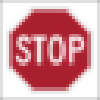
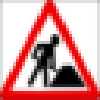
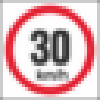
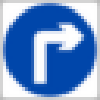
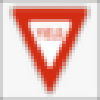


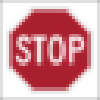
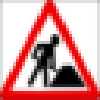
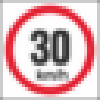
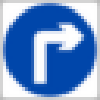
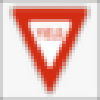

In [39]:
from skimage.transform import resize
import glob
X_test_new = []
y_test_new = np.array([14,25,1, 33,13])
y_test_title = np.array(["Stop","Road Work", "Speed limit (30km/h)", "Turn right ahead", "Yield"])
path = "img/*.png"
for image_path in glob.glob(path):
    new_img = mpimg.imread(image_path)
    r = new_img[:, :, 0]
    g = new_img[:, :, 1]
    b = new_img[:, :, 2]
    r = resize(r, (32, 32),anti_aliasing=True)
    g = resize(g, (32, 32),anti_aliasing=True)
    b = resize(b, (32, 32),anti_aliasing=True)
    new_img = np.dstack((r,g,b))
    X_test_new.append(new_img)    
ipyplot.plot_images(images=X_test_new, labels=y_test_title, max_images=5, img_width=100)

### Predict the Sign Type for Each Image

In [41]:
save_file = "model_weight/weight3.cpk"
prediction_img = tf.nn.softmax(logits)
# X_test_nor = np.array([preproc_image(X_test_new[i]) for i in range(len(X_test_new))], dtype = np.float32)
# X_test_new = X_test_nor
with tf.Session() as sess:
    saver.restore(sess, save_file)
    _,test_accuracy = evaluate(X_test_new, y_test_new)
    test_loss, test_accuracy = evaluate(X_test_new, y_test_new)
    softmax_prob = sess.run(prediction_img, feed_dict={x: X_test_new,keep_prob: 1.0})
    top5_prob = sess.run(tf.nn.top_k(softmax_prob, k = 5))

INFO:tensorflow:Restoring parameters from model_weight/weight3.cpk


### Analyze Performance

In [42]:
print("New Test Set Accuracy = {:.3f}".format(test_accuracy))

New Test Set Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

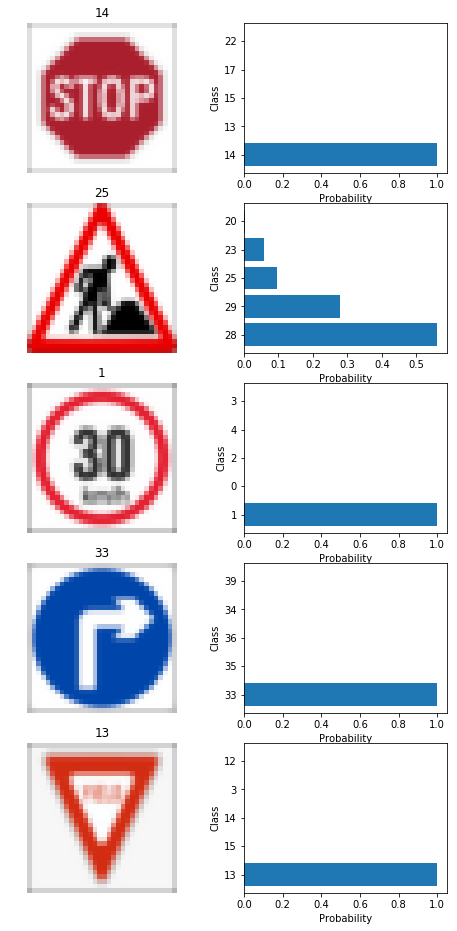

In [43]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
plt.figure(figsize = (8, 16))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(X_test_new[i].squeeze(), cmap = 'gray') 
    plt.title(y_test_new[i])
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), top5_prob.values[i, :])
    plt.ylabel("Class")
    plt.xlabel("Probability")
    labs = top5_prob.indices[i]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.